# Inversion with topography
In this notebook, we will learn how to add topography and perform 2D inversion with rectangular and triangular meshes. The files needed can be found in `resipy/examples/workshop/04-dc-topo/`.

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # just to make it cleaner in the notebook
import os
import sys
sys.path.append((os.path.relpath('../src'))) # add here the relative path of the API folder

import numpy as np # this will be used to read the topography file
testdir = '../src/resipy/test/'

from resipy.R2 import R2

API path =  /media/jkl/data/phd/tmp/pyr2/src/resipy
ResIPy version =  1.1.5


First, let's create an R2 object and import the survey as usual.

In [3]:
k = R2() # create new R2 object and use default working directory
k.createSurvey(os.path.join(testdir, 'syscalFileTopo.csv'))

Working directory is: /media/jkl/data/phd/tmp/pyr2/src/resipy/invdir
clearing the dirname
Inf or NaN: filterData: 0 / 636 quadrupoles removed.
strange quadrupoles: filterData: 0 / 636 quadrupoles removed.
36/636 reciprocal measurements NOT found.
8 measurements error > 20 %


We can also plot the pseudo-section. Note that this one remains flat event when there is topogragraphy involved.

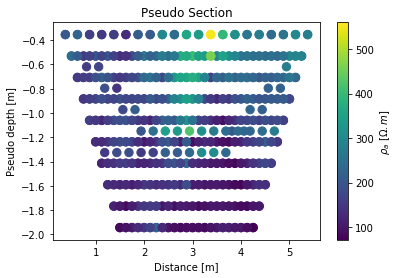

In [4]:
k.pseudo()

If we take a look at the electrodes position by plotting `R2.elec` we can see that there is no topography yet (all the values in the third column (=z) are 0.0).

In [5]:
k.elec

array([[0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.  ],
       [0.5 , 0.  , 0.  ],
       [0.75, 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.25, 0.  , 0.  ],
       [1.5 , 0.  , 0.  ],
       [1.75, 0.  , 0.  ],
       [2.  , 0.  , 0.  ],
       [2.25, 0.  , 0.  ],
       [2.5 , 0.  , 0.  ],
       [2.75, 0.  , 0.  ],
       [3.  , 0.  , 0.  ],
       [3.25, 0.  , 0.  ],
       [3.5 , 0.  , 0.  ],
       [3.75, 0.  , 0.  ],
       [4.  , 0.  , 0.  ],
       [4.25, 0.  , 0.  ],
       [4.5 , 0.  , 0.  ],
       [4.75, 0.  , 0.  ],
       [5.  , 0.  , 0.  ],
       [5.25, 0.  , 0.  ],
       [5.5 , 0.  , 0.  ],
       [5.75, 0.  , 0.  ]])

Then we can load a csv file that will add topography for each electrode. The csv file should be of the form X,Y,Z and no headers are needed.

In [6]:
k.importElec(os.path.join(testdir + 'elecTopo.csv'))
print(k.elec)

[[ 0.     0.    29.499]
 [ 0.25   0.    29.504]
 [ 0.5    0.    29.509]
 [ 0.75   0.    29.516]
 [ 1.     0.    29.478]
 [ 1.25   0.    29.461]
 [ 1.5    0.    29.454]
 [ 1.75   0.    29.428]
 [ 2.     0.    29.416]
 [ 2.25   0.    29.411]
 [ 2.5    0.    29.398]
 [ 2.75   0.    29.362]
 [ 3.     0.    29.329]
 [ 3.25   0.    29.245]
 [ 3.5    0.    29.159]
 [ 3.75   0.    29.083]
 [ 4.     0.    29.01 ]
 [ 4.25   0.    28.929]
 [ 4.5    0.    28.872]
 [ 4.75   0.    28.761]
 [ 5.     0.    28.672]
 [ 5.25   0.    28.593]
 [ 5.5    0.    28.509]
 [ 5.75   0.    28.412]]


We can now create a mesh either triangular or rectangular.

computed DOI : 26.25
quad
written mesh.dat file to 
/media/jkl/data/phd/tmp/pyr2/src/resipy/invdir/mesh.dat
Mesh plotted in 0.15188 seconds


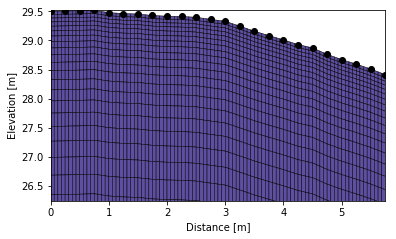

In [7]:
k.createMesh(typ='quad') # or trian for triangular mesh
k.showMesh()

We can finally invert the data on this mesh. Note that it might take a while so be patient.

In [8]:
k.invert()

Writing .in file and protocol.dat ...
written mesh.dat file to 
/media/jkl/data/phd/tmp/pyr2/src/resipy/invdir/mesh.dat
done

--------------------- MAIN INVERSION ------------------



 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v3.3 <<

 >> D a t e : 22 - 04 - 2019
 >> My beautiful survey
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<
 >> D a t a   w e i g h t s   w i l l   b e  m o d i f i e d <<


 Processing dataset   1


 Measurements read:   336     Measurements rejected:     0
   Geometric mean of apparent resistivities:  0.35339E+03

 >> Total Memory required is:          0.242 Gb

   Iteration   1
     Initial RMS

reading  /media/jkl/data/phd/tmp/pyr2/src/resipy/invdir/f001_res.vtk ...done
Mesh plotted in 0.11124 seconds


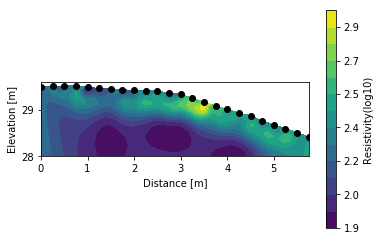

In [9]:
k.showResults(contour=True, sens=False, zlim=[28,29.6]) # with contour

# In a nutshell

Working directory is: /media/jkl/data/phd/tmp/pyr2/src/resipy/invdir
clearing the dirname
Inf or NaN: filterData: 0 / 636 quadrupoles removed.
strange quadrupoles: filterData: 0 / 636 quadrupoles removed.
36/636 reciprocal measurements NOT found.
8 measurements error > 20 %
Create Rectangular mesh...
computed DOI : 26.25
Using a quadrilateral mesh.
quad
written mesh.dat file to 
/media/jkl/data/phd/tmp/pyr2/src/resipy/invdir/mesh.dat
done

Writing .in file and protocol.dat ...
written mesh.dat file to 
/media/jkl/data/phd/tmp/pyr2/src/resipy/invdir/mesh.dat
done

--------------------- MAIN INVERSION ------------------



 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v3.3 <<

 >> D a t e : 22 - 04 - 2019
 >> My beautiful survey
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat
 >> R e g u l a r 

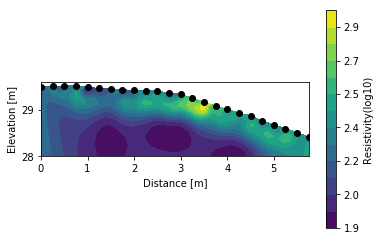

In [10]:
k = R2()
k.createSurvey('../src/resipy/test/syscalFileTopo.csv')
k.importElec('../src/resipy/test/elecTopo.csv')
k.invert()
k.showResults(contour=True, sens=False, zlim=[28,29.6])